# Predicting Employee Attrition Project

In [1]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv") 
print (dataset.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

# Information about the Dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Heatmap to check Dataset

<Axes: >

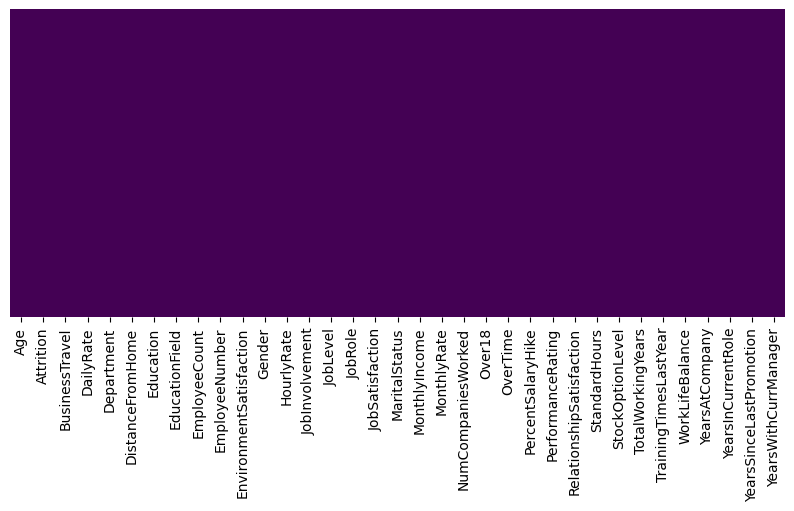

In [4]:
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), 
            yticklabels = False, 
            cbar = False, 
            cmap ='viridis')

# Preprocessing the Data

In [5]:
dataset.drop('EmployeeCount', 
            axis = 1, 
            inplace = True) 
dataset.drop('StandardHours', 
            axis = 1, 
            inplace = True) 
dataset.drop('EmployeeNumber', 
            axis = 1, 
            inplace = True) 
dataset.drop('Over18', 
            axis = 1, 
            inplace = True) 

print(dataset.shape)

(1470, 31)


# Input and Output data

In [6]:
y = dataset.iloc[:, 1] 
X = dataset 

X.drop('Attrition', 
    axis = 1, 
    inplace = True)

# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

# Dummy variable creation

In [8]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'], 
                                    prefix ='BusinessTravel') 

dum_Department = pd.get_dummies(dataset['Department'], 
                                prefix ='Department') 

dum_EducationField = pd.get_dummies(dataset['EducationField'], 
                                prefix ='EducationField') 

dum_Gender = pd.get_dummies(dataset['Gender'], 
                        prefix ='Gender', drop_first = True) 

dum_JobRole = pd.get_dummies(dataset['JobRole'], 
                            prefix ='JobRole') 

dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'], 

                                prefix ='MaritalStatus') 

dum_OverTime = pd.get_dummies(dataset['OverTime'], 
                            prefix ='OverTime', drop_first = True) 

X = pd.concat([X, dum_BusinessTravel, dum_Department, 
            dum_EducationField, dum_Gender, dum_JobRole, 
            dum_MaritalStatus, dum_OverTime], axis = 1) 

 
X.drop(['BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], 
    axis = 1, inplace = True) 

print(X.shape) 
print(y.shape)

(1470, 49)
(1470,)


# Splitting data to training and testing

In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( 

X, y, test_size = 0.25, random_state = 40)

# Random Forest Classifier Model Test & Result

In [10]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, 
                            criterion='entropy') 
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 

def print_score(clf, X_train, y_train, 
                X_test, y_test, 
                train=True): 

    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
            y_train, clf.predict(X_train)))) 

        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
            y_train, clf.predict(X_train)))) 

        res = cross_val_score(clf, X_train, y_train, 
                            cv=10, scoring='accuracy') 

        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("----------------------------------------------------------") 

    elif train == False: 

        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
            classification_report(y_test, clf.predict(X_test)))) 

        print("Confusion Matrix: \n {}\n".format( 
            confusion_matrix(y_test, clf.predict(X_test)))) 

        print("accuracy score: {0:.4f}\n".format( 
            accuracy_score(y_test, clf.predict(X_test)))) 

        print("-----------------------------------------------------------") 

print_score(rf, X_train, y_train, 
            X_test, y_test, 
            train=True) 

print_score(rf, X_train, y_train, 
            X_test, y_test, 
            train=False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       922
           1       1.00      0.87      0.93       180

    accuracy                           0.98      1102
   macro avg       0.99      0.93      0.96      1102
weighted avg       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[922   0]
 [ 24 156]]

Average Accuracy: 	 0.8394
Accuracy SD: 		 0.0179
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       311
           1       0.93      0.23      0.37        57

    accuracy                           0.88       368
   macro avg       0.90      0.61      0.65       368
weighted avg       0.88      0.88      0.84       368


Confusion Matrix: 
 [[310   1]
 [ 44  13]]

accuracy score: 0.8777

---------------------

# Key features for deciding the result

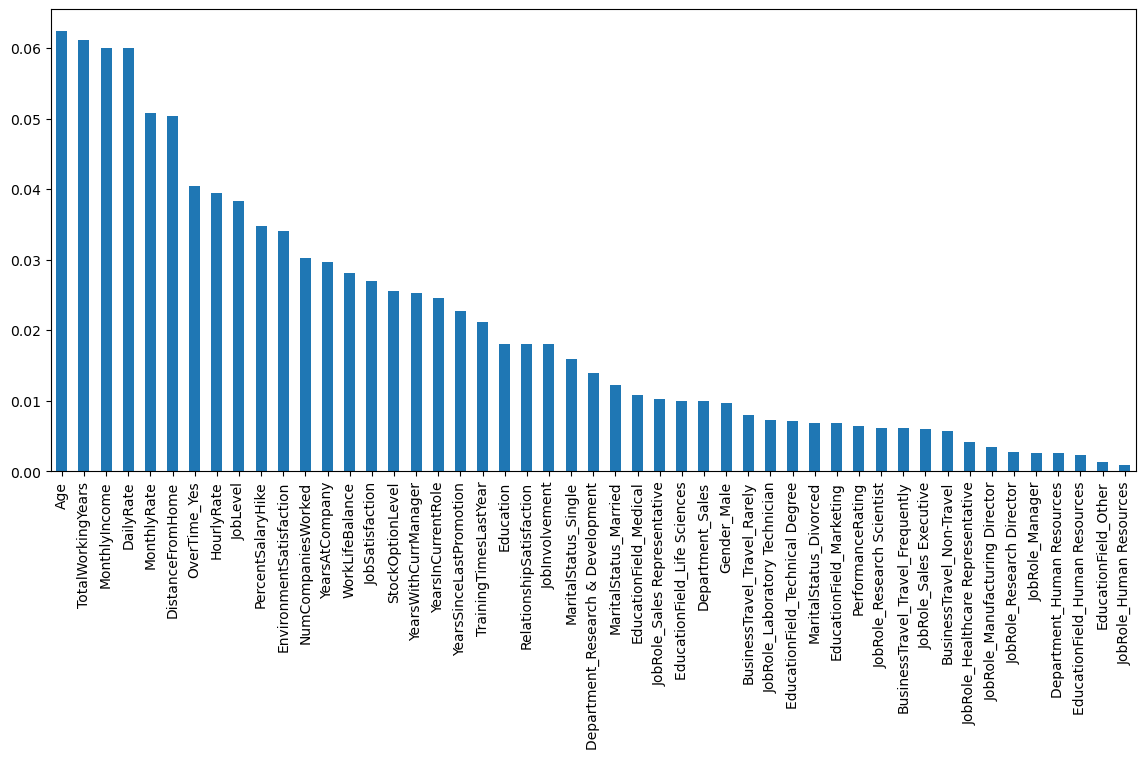

In [11]:
pd.Series(rf.feature_importances_, 
        index = X.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (14,6)); 

In [12]:
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test1 = st_x.transform(X_test)

# Using KNeighborsClassifier Model 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)

print(X_test)

y_pred = classifier.predict(X_test1)
print("Y-Test")
print(y_test)
print("Y-Pred")
print(y_pred)

      Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1456   35       1199                18          4                        3   
236    33        465                 2          2                        1   
70     59       1225                 1          1                        1   
42     26       1357                25          3                        1   
454    29        232                19          3                        4   
...   ...        ...               ...        ...                      ...   
702    30        231                 8          2                        3   
436    33        587                10          1                        1   
1194   47       1225                 2          4                        2   
1248   27       1054                 8          3                        3   
9      36       1299                27          3                        3   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  Mo

# Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix Data...")
print(cm)

Confusion Matrix Data...
[[302   9]
 [ 48   9]]


# Classification Report and Accuracy Score

In [15]:
from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(y_test, y_pred)
clf = classification_report(y_test, y_pred)
print (acc)
print(clf)

0.845108695652174
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       311
           1       0.50      0.16      0.24        57

    accuracy                           0.85       368
   macro avg       0.68      0.56      0.58       368
weighted avg       0.81      0.85      0.81       368

